# Riiid Answer Correctness Prediction

**About Problem Statement:**

Tailoring education to a student's ability level is one of the many valuable things an AI tutor can do.In this competetion we had provided with the some sorts of information a complete education app would have: that student's historic performance, the performance of other students on the same question, metadata about the question itself, and more.So, based on this history if create a ML model to predict how students will perform on future interactions,then it will bridge the gap between the student performance and his learning skills.It will help tackle global challenges in education. If successful, it’s possible that any student with an Internet connection can enjoy the benefits of a personalized learning experience, regardless of where they live.

**About the data**:

Riiid Labs, an AI solutions provider delivering creative disruption to the education market, empowers global education players to rethink traditional ways of learning leveraging AI. With a strong belief in equal opportunity in education, Riiid launched an AI tutor based on deep-learning algorithms in 2017 that attracted more than one million South Korean students.This year, the company released EdNet, the world’s largest open database for AI education containing more than 100 million student interactions.So,all we need to do is to pair your machine learning skills using Riiid’s EdNet data. 

**Objective**:

Tailoring education to a student's ability level is one of the many valuable things an AI tutor can do.So,In this competition,challenge is to create algorithms for "Knowledge Tracing," the modeling of student knowledge over time 
**i.e you will predict whether students are able to answer their next questions correctly**



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riiid-test-answer-prediction/example_sample_submission.csv
/kaggle/input/riiid-test-answer-prediction/example_test.csv
/kaggle/input/riiid-test-answer-prediction/questions.csv
/kaggle/input/riiid-test-answer-prediction/train.csv
/kaggle/input/riiid-test-answer-prediction/lectures.csv
/kaggle/input/riiid-test-answer-prediction/riiideducation/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/riiid-test-answer-prediction/riiideducation/__init__.py
/kaggle/input/riiid-reduced-dataset/reduced.pkl.gzip
/kaggle/input/riiid-reduced-dataset/__notebook_source__.ipynb


****This notebook contains EDA of train data.Here,I done some analysis on each features to understand the distribution of data.I had created some features like percentage,minutes in order to get understand the performace of each user and also difficulty level of content.Up to my knowledge I tried to explore more ways to analyse the feature to get clear picture of dataset**
 
**As the datset is too large,so I had reduced the datset by changing the datatype of feature based on its range and created a dataset which i used here.******

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

orginal dataset: https://www.kaggle.com/c/riiid-test-answer-prediction/data
Actually dataset is of 3.5gb,so I had reduced the dataset by converting the data type of each feature on possible range and had uploaded the data in kaggle

reduced dataset(myown): https://www.kaggle.com/printnaveen/riiid-reduced-dataset

In [4]:
data=pd.read_pickle('../input/riiid-reduced-dataset/reduced.pkl.gzip')
data.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
data.shape

(101230332, 10)

 ## Some basic eda on features

<AxesSubplot:xlabel='content_type_id', ylabel='count'>

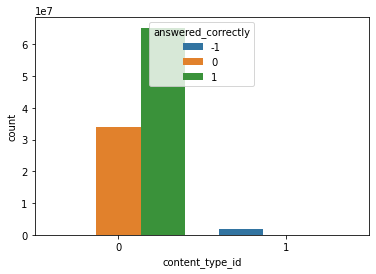

In [6]:
sns.countplot(x='content_type_id',hue='answered_correctly',data=data)

<AxesSubplot:xlabel='answered_correctly', ylabel='count'>

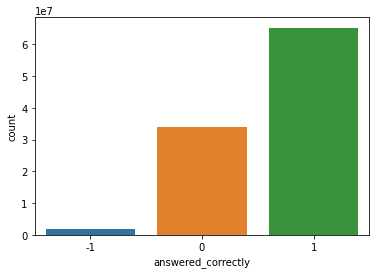

In [7]:
sns.countplot(x='answered_correctly',data=data)

<AxesSubplot:xlabel='user_answer', ylabel='count'>

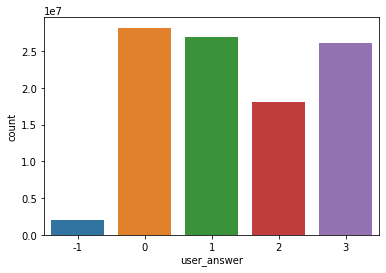

In [8]:
sns.countplot(x='user_answer',data=data)

<AxesSubplot:xlabel='user_answer', ylabel='count'>

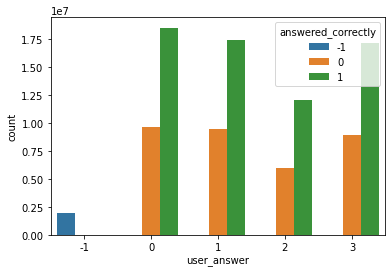

In [9]:
sns.countplot(x='user_answer',hue='answered_correctly',data=data)

**Observation:**

1.In given data,there are more content related to questions than lecture

2.And there are more users who answered correctly for attempted questions



In [10]:
#separating the data of users who attempted only questions
new=data[data['content_type_id']==0]
new.shape

(99271300, 10)

In [11]:
#grouuping the user_od and checking how many of them given correct answer (by using sum)
#and also counting no of questions they attempted (by using count)

g=new[['user_id','answered_correctly','prior_question_elapsed_time']].groupby('user_id').sum().reset_index()
g_=new[['user_id','answered_correctly']].groupby('user_id').count().reset_index()

#g.sort_values('answered_correctly',inplace=True,ascending=False)
g.head()

,user_id,answered_correctly,prior_question_elapsed_time
0,115,32.0,896999.0
1,124,7.0,544997.0
2,2746,11.0,325000.0
3,5382,84.0,4470000.0
4,8623,70.0,2819600.0


In [12]:
#now adding count column to main datagrame i.e g 
#and also finding the succes ratio of each user i.e no of crct answers/total no of question attempted

g['total']=g_['answered_correctly']
g['per']=np.round((g['answered_correctly']/g['total'])*100)
sort=g.sort_values('per',ascending=False)
sort.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per
390617,2131395801,2.0,14000.0,2,100.0
11057,60215278,1.0,0.0,1,100.0
186326,1019843964,1.0,0.0,1,100.0
283847,1552058047,30.0,348661.0,30,100.0
118248,648296210,30.0,440994.0,30,100.0


Above dataframe tells the user's no of correct answers to his total attempted question and also the percentage of his performance

In [13]:
def percentage_answer(type):
    
    plt.figure(figsize=(15,5))
    plt.xlabel('each users performance on their examination in terms of percentage')
    plt.ylabel('no of students')
    if type=='desc':
        per=g['per'].value_counts().sort_index(ascending=False)
        sns.barplot(x=per.index[:25],y=per.values[:25].astype('int'),order=per.index[:25].astype('int'))
        plt.title('top percentage of students who perfomed very well in exam')

        
    elif type=='asc':
        per=g['per'].value_counts().sort_index(ascending=True)
        sns.barplot(x=per.index[:25],y=per.values[:25].astype('int'),order=per.index[:25].astype('int'))  
        plt.title('least percentage of students who performed bad in exam')
    elif type=='top':
        per=g['per'].value_counts()
        sns.barplot(x=per.index[:25],y=per.values[:25].astype('int'),order=per.index[:25].astype('int'))
        plt.title('highest percentage of students who answered correctly')


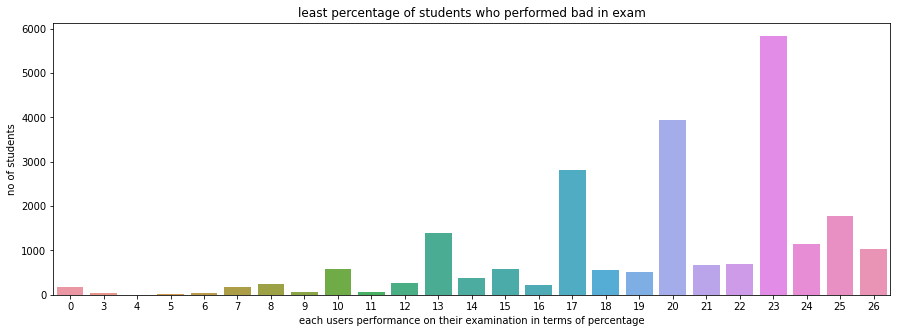

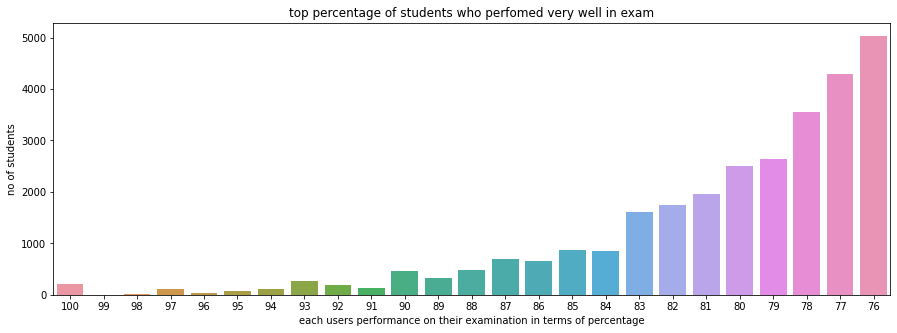

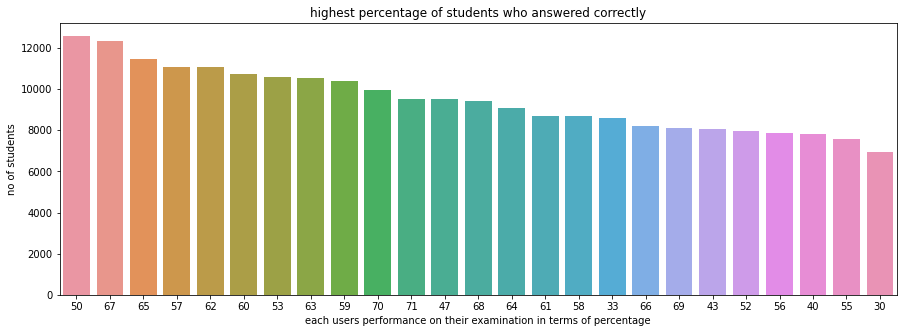

In [14]:
percentage_answer('asc')
print()
percentage_answer('desc')
percentage_answer('top')

**Observation:**

1.Above plot is about the distribution of students/users falling on each percentage i.e performance

2.There are no higher number of users who got 100 percentage in exams ,so only few users falled below 90 percentage in exam

3.Coming to poor performance,only few users got very less percentage

4.And in whole examination,lot of users got only 50 percent sucess rate and almost lot of users fallen in between 40 to 60 percentage


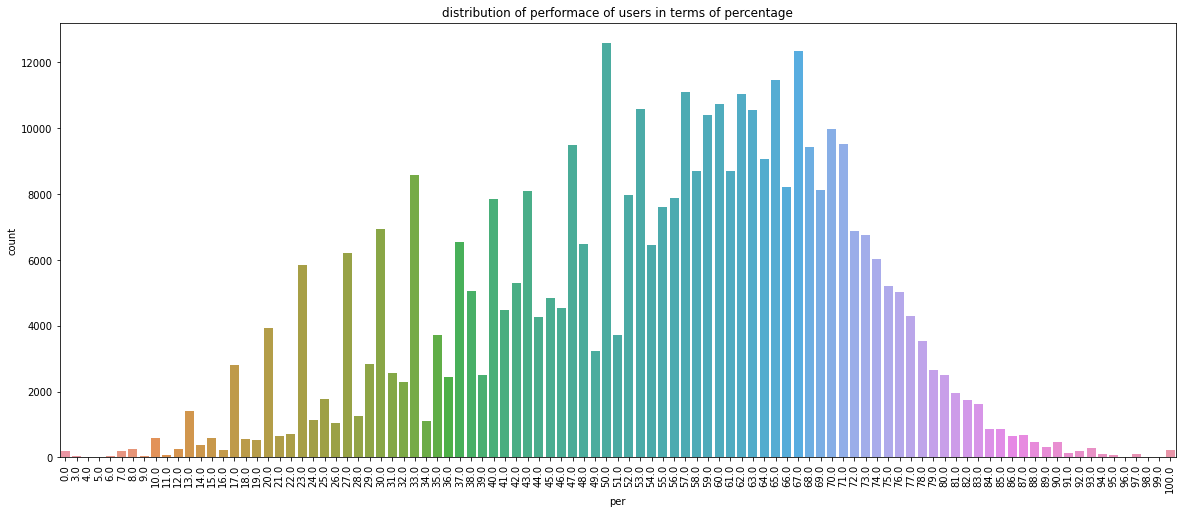

In [15]:
#checking the no of users falling in percentage



plt.figure(figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
sns.countplot(x='per',data=g,order=g['per'].value_counts().sort_index().index)
plt.title('distribution of performace of users in terms of percentage')
plt.xticks(rotation=90)
plt.show()

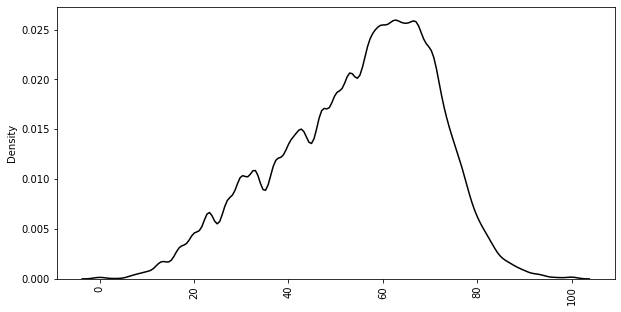

In [16]:
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='y')
sns.distplot(g['per'].values,color='black',hist=False)
plt.xticks(rotation=90)
plt.show()

**Obseravtion:**

Interestingly,the performace of all users has gaussian distribution i.e lot of users fallen in atmost 40 to 80 percentage
and very few users had performed worst and viceversa



Text(0, 0.5, 'no of students')

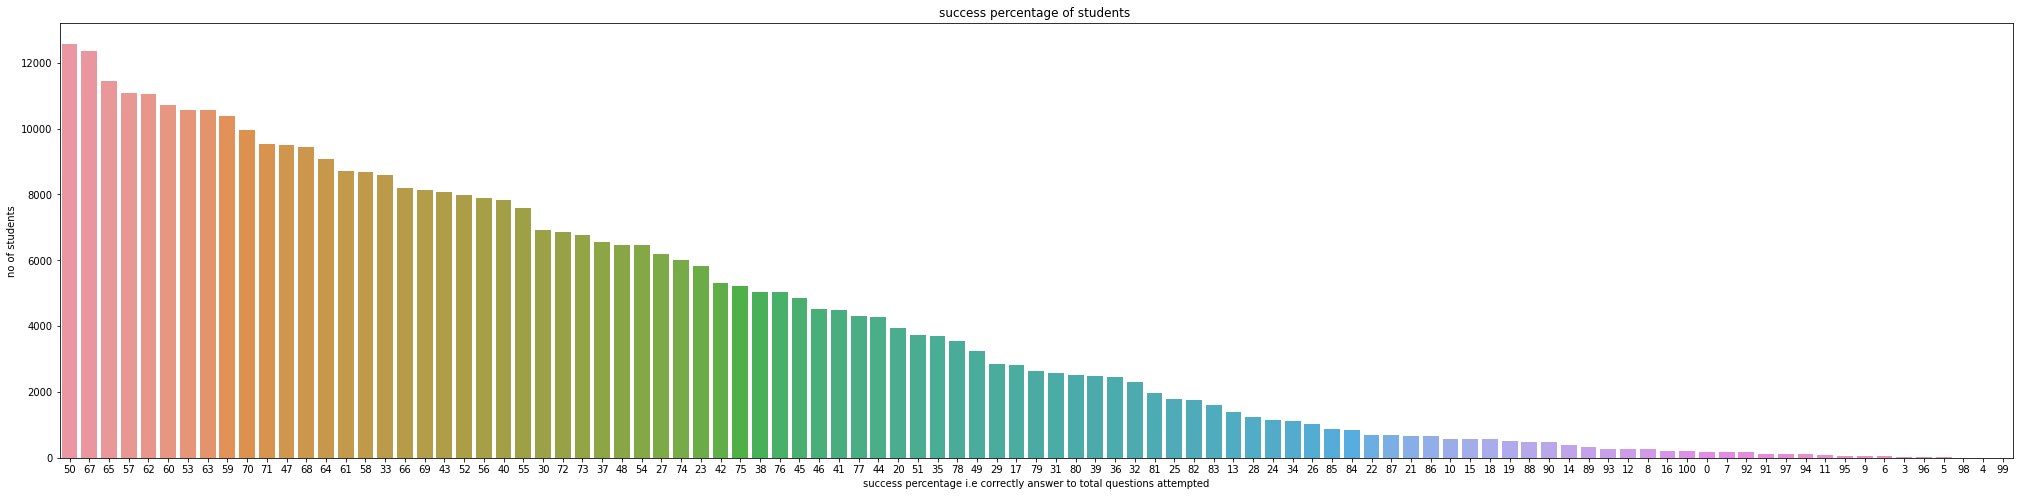

In [17]:
plt.figure(figsize=(35,8))
per=g['per'].value_counts()
sns.barplot(x=per.index.astype('int'),y=per.values,order=per.index.astype('int'))
plt.title('success percentage of students ')
plt.xlabel('success percentage i.e correctly answer to total questions attempted')
plt.ylabel('no of students')

**Observation:**

From this plot,it clear that lot of users got 50 percentage in the exams and very least users got 99 percenatge

## Top 20 students who answered correctly

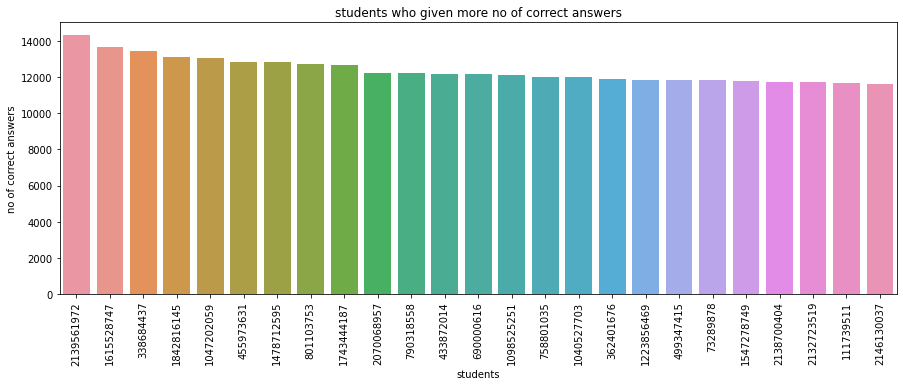

In [18]:

tp_20=g.sort_values('answered_correctly',ascending=False)[:25]

plt.figure(figsize=(15,5))
sns.barplot(x='user_id',y='answered_correctly',data=tp_20,order=tp_20['user_id'])
plt.title('students who given more no of correct answers')
plt.xlabel('students')
plt.ylabel('no of correct answers')
plt.xticks(rotation=90)
plt.show()

## Top 20 cotent mostly seen by students

total no of unique content: 25


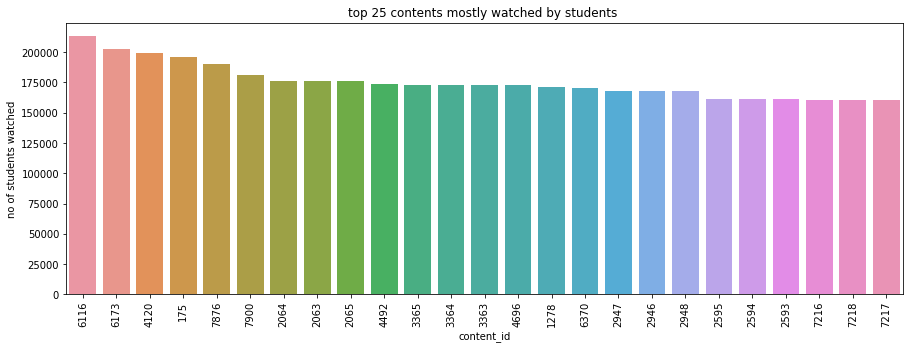

In [19]:
contnt=data['content_id'].value_counts()[:25]
print('total no of unique content:',len(contnt))

plt.figure(figsize=(15,5))
sns.barplot(x=contnt.index,y=contnt.values,order=contnt.index)
plt.title('top 25 contents mostly watched by students ')
plt.xlabel('content_id')
plt.ylabel('no of students watched')
plt.xticks(rotation=90)
plt.show()

## Analysis on time taken by users

In [20]:
g.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per
0,115,32.0,896999.0,46,70.0
1,124,7.0,544997.0,30,23.0
2,2746,11.0,325000.0,19,58.0
3,5382,84.0,4470000.0,125,67.0
4,8623,70.0,2819600.0,109,64.0


In [21]:
#adding mintue column to data,so that it tells the time taken by each user in minutes
g['mintues']=np.round(g['prior_question_elapsed_time']/60000)
g.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per,mintues
0,115,32.0,896999.0,46,70.0,15.0
1,124,7.0,544997.0,30,23.0,9.0
2,2746,11.0,325000.0,19,58.0,5.0
3,5382,84.0,4470000.0,125,67.0,74.0
4,8623,70.0,2819600.0,109,64.0,47.0


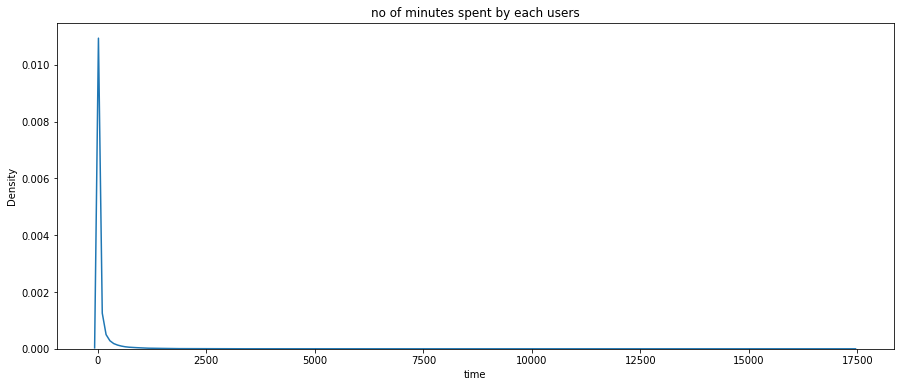

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(g['mintues'].values,hist=False)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.title('no of minutes spent by each users')
plt.xlabel('time')
plt.show()

**Observation:**

The distribution of  time spent by all users seems to be right skewed i.e there are only few users who took more time than others
so it is skewed and there are lot os users who took almost same time

But Above chart is not showing clear picture,so trying to take only less data to see the clear distribution of time

In [23]:
g['mintues'].mean(),g['mintues'].min(),g['mintues'].max(),np.percentile(g['mintues'].values,99),len(np.unique(g['mintues'].values))

(106.42990112304688, 0.0, 17383.0, 1519.0, 3495)

**Observation:**

From above code,it is clear that 99 of users took time below 1519 but in data max time took by user is 17383,so there are few users who  took lot of time than ususal which seems to be rare

In [24]:
# below function takes data based on given condition 
def dist_of_minutes(index,type):
    if type=='most':
        user_tim=g['mintues'].value_counts()[:index]  ##taking data in descending order of time spent by all users i.e gives mintues
                                                        #where most of users spent
        small_d=g['mintues'][g['mintues'].isin(user_tim.index)]
        plt.figure(figsize=(15,6.5))
        sns.distplot(small_d.values)
        plt.ticklabel_format(style='plain', axis='y')
        plt.ticklabel_format(style='plain', axis='x')
        plt.title('no of minutes spent by most of users')
        plt.show()
        
    elif type=='rare':
        user_tim=g['mintues'].value_counts().sort_values() #taking data in ascedning order of time spent by all users i.e gives mintues
                                                            #where most of users spent very less
        small_d=g['mintues'][g['mintues'].isin(user_tim.index[:index])]
        plt.figure(figsize=(15,6.5))
        sns.distplot(small_d.values)
        plt.ticklabel_format(style='plain', axis='y')
        plt.ticklabel_format(style='plain', axis='x')
        plt.title('no of minutes spent by very few users')
        plt.show()

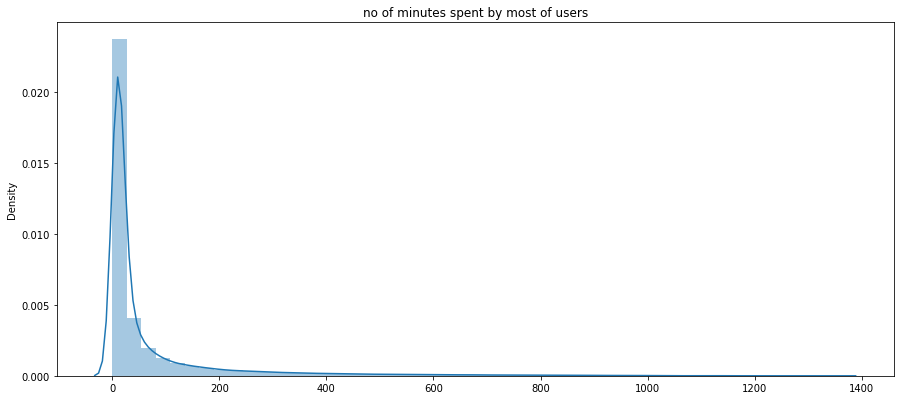

In [25]:
dist_of_minutes(1000,type='most')

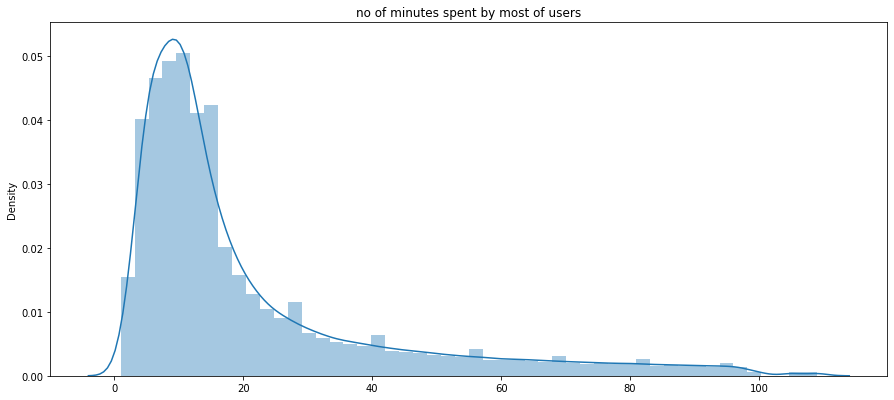

In [26]:
dist_of_minutes(100,type='most')

**Observation**:

1.From above two graphs,it is clear that in most of users spent more time in between 0 to 20 mins 

2.And the very few users falling into the bin as the time increases..in precise lot of users spending very less time and very few users 
spending lot of time



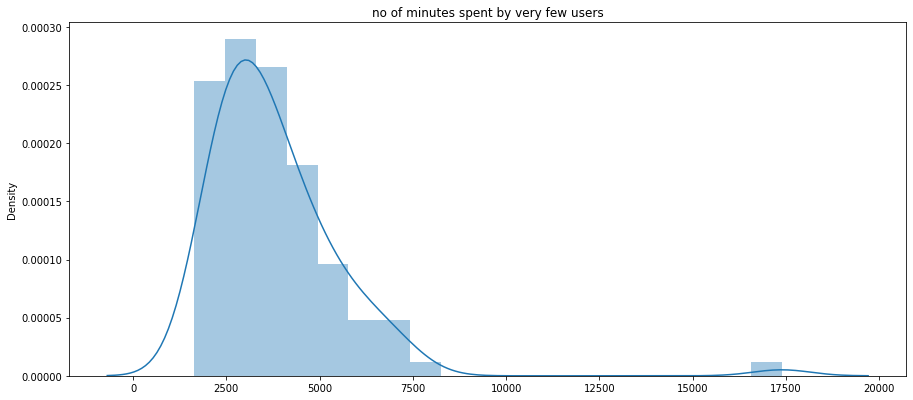

In [27]:
dist_of_minutes(100,type='rare')

And there are very few users who spending lot of time as shown above

In [28]:
g.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per,mintues
0,115,32.0,896999.0,46,70.0,15.0
1,124,7.0,544997.0,30,23.0,9.0
2,2746,11.0,325000.0,19,58.0,5.0
3,5382,84.0,4470000.0,125,67.0,74.0
4,8623,70.0,2819600.0,109,64.0,47.0


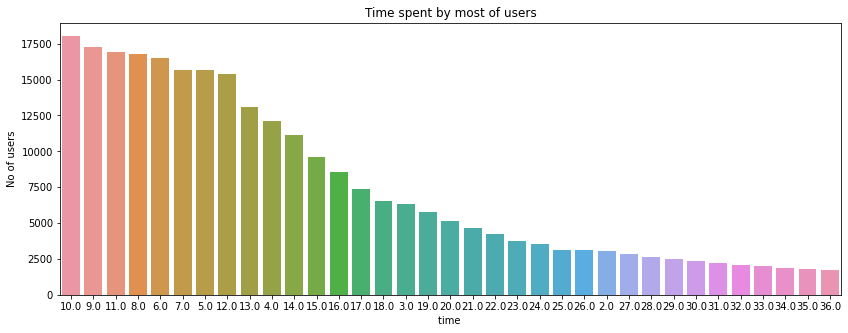

In [29]:
val=g['mintues'].value_counts()
plt.figure(figsize=(14,5))
sns.barplot(x=val.index[:35],y=val.values[:35],order=val.index[:35])
plt.title('Time spent by most of users')
plt.xlabel('time ')
plt.ylabel('No of users')
plt.show()

**Observation:**

Most of users spent 10 minutes in exam/content and almost lot of users spent time in between 10 to 25 minutes

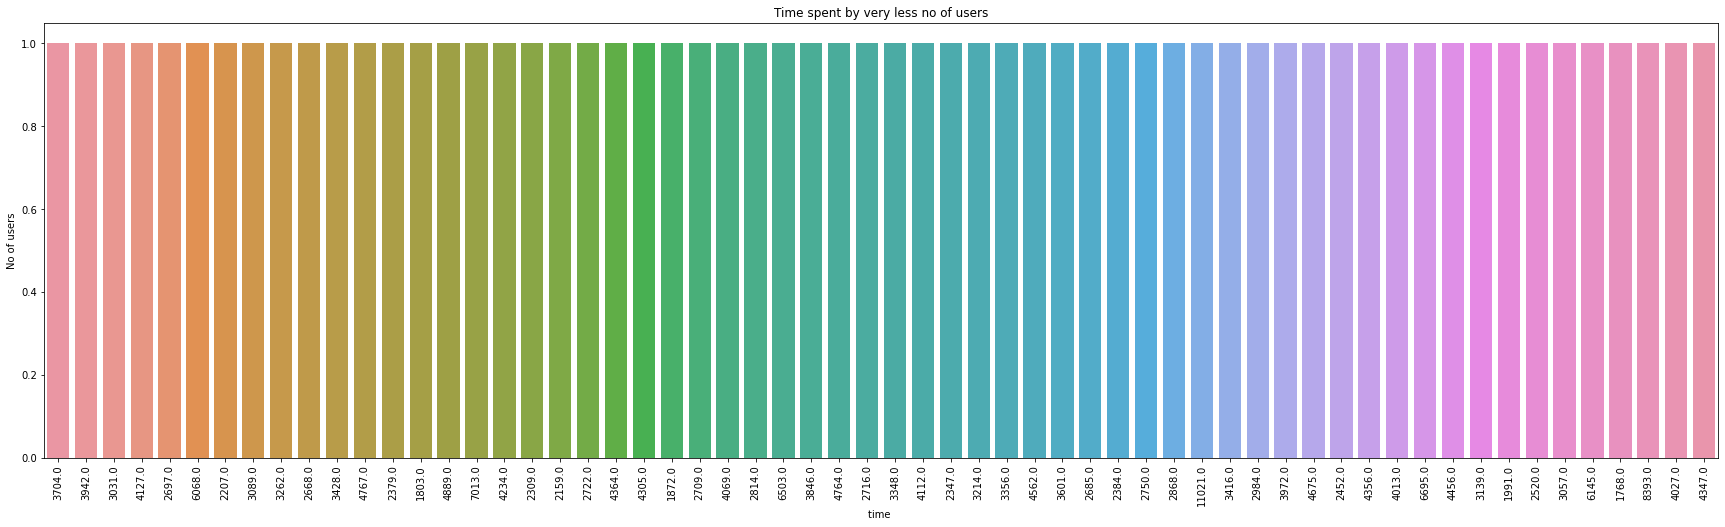

In [30]:
plt.figure(figsize=(30,8))
sns.barplot(x=val.index[-60:],y=val.values[-60:],order=val.index[-60:])
plt.xticks(rotation=90)
plt.title('Time spent by very less no of users')
plt.xlabel('time ')
plt.ylabel('No of users')
plt.show()


**Observation:**

Very few users spent more time and that too every indiviudal user had unique time which is more

## Most time spent by all users and their performance

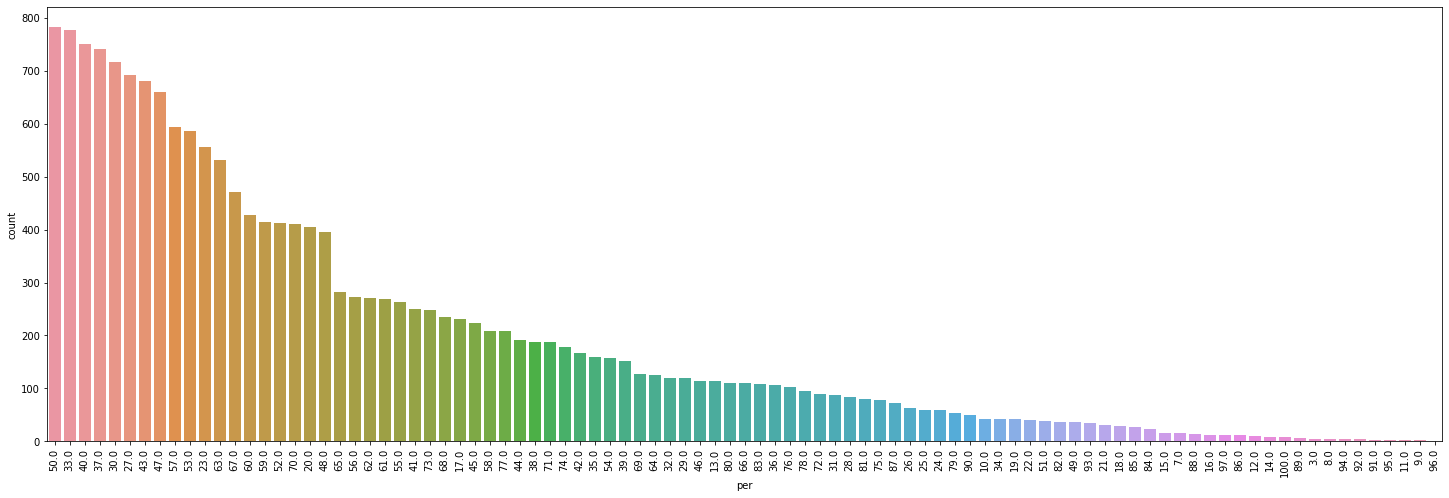

In [31]:

min_10=g[g['mintues']==10.0]

plt.figure(figsize=(25,8))
sns.countplot(x='per',data=min_10,order=min_10['per'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Observation:**

As 10.00 mintues is time spent by most of users in examination,so above plot gives the percentage result of those users who spent 10mins in exam

So,it is clear that most of users who spent 10min had got only 50 percentage followed by 33 percent i.e not good performance

## Time spend by user who answered very correctly i.e top 20 users who given more correct answer

In [32]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

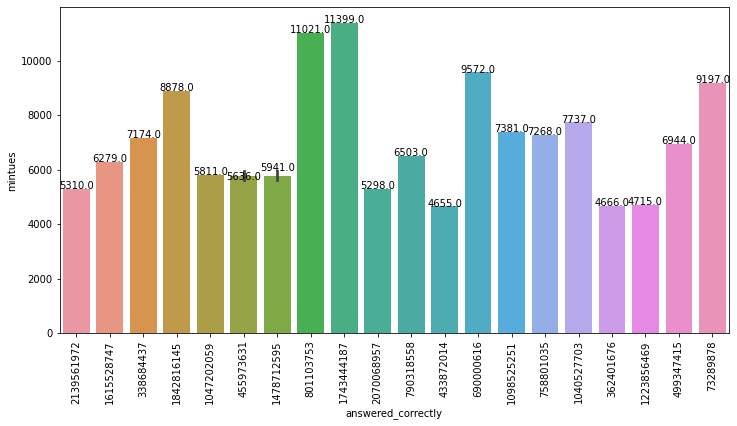

In [33]:
sort_ans=g.sort_values('answered_correctly',ascending=False)[:20]
sort_ans.shape

plt.figure(figsize=(12,6))
sns.barplot(x='answered_correctly',y='mintues',data=sort_ans,order=sort_ans['answered_correctly'])

plt.xticks(range(len(sort_ans)),sort_ans['user_id'])
plt.xticks(rotation=90)
addlabels(sort_ans['user_id'].values,sort_ans['mintues'].values)



plt.show()


## Average time spend by user who got top percentage in exam

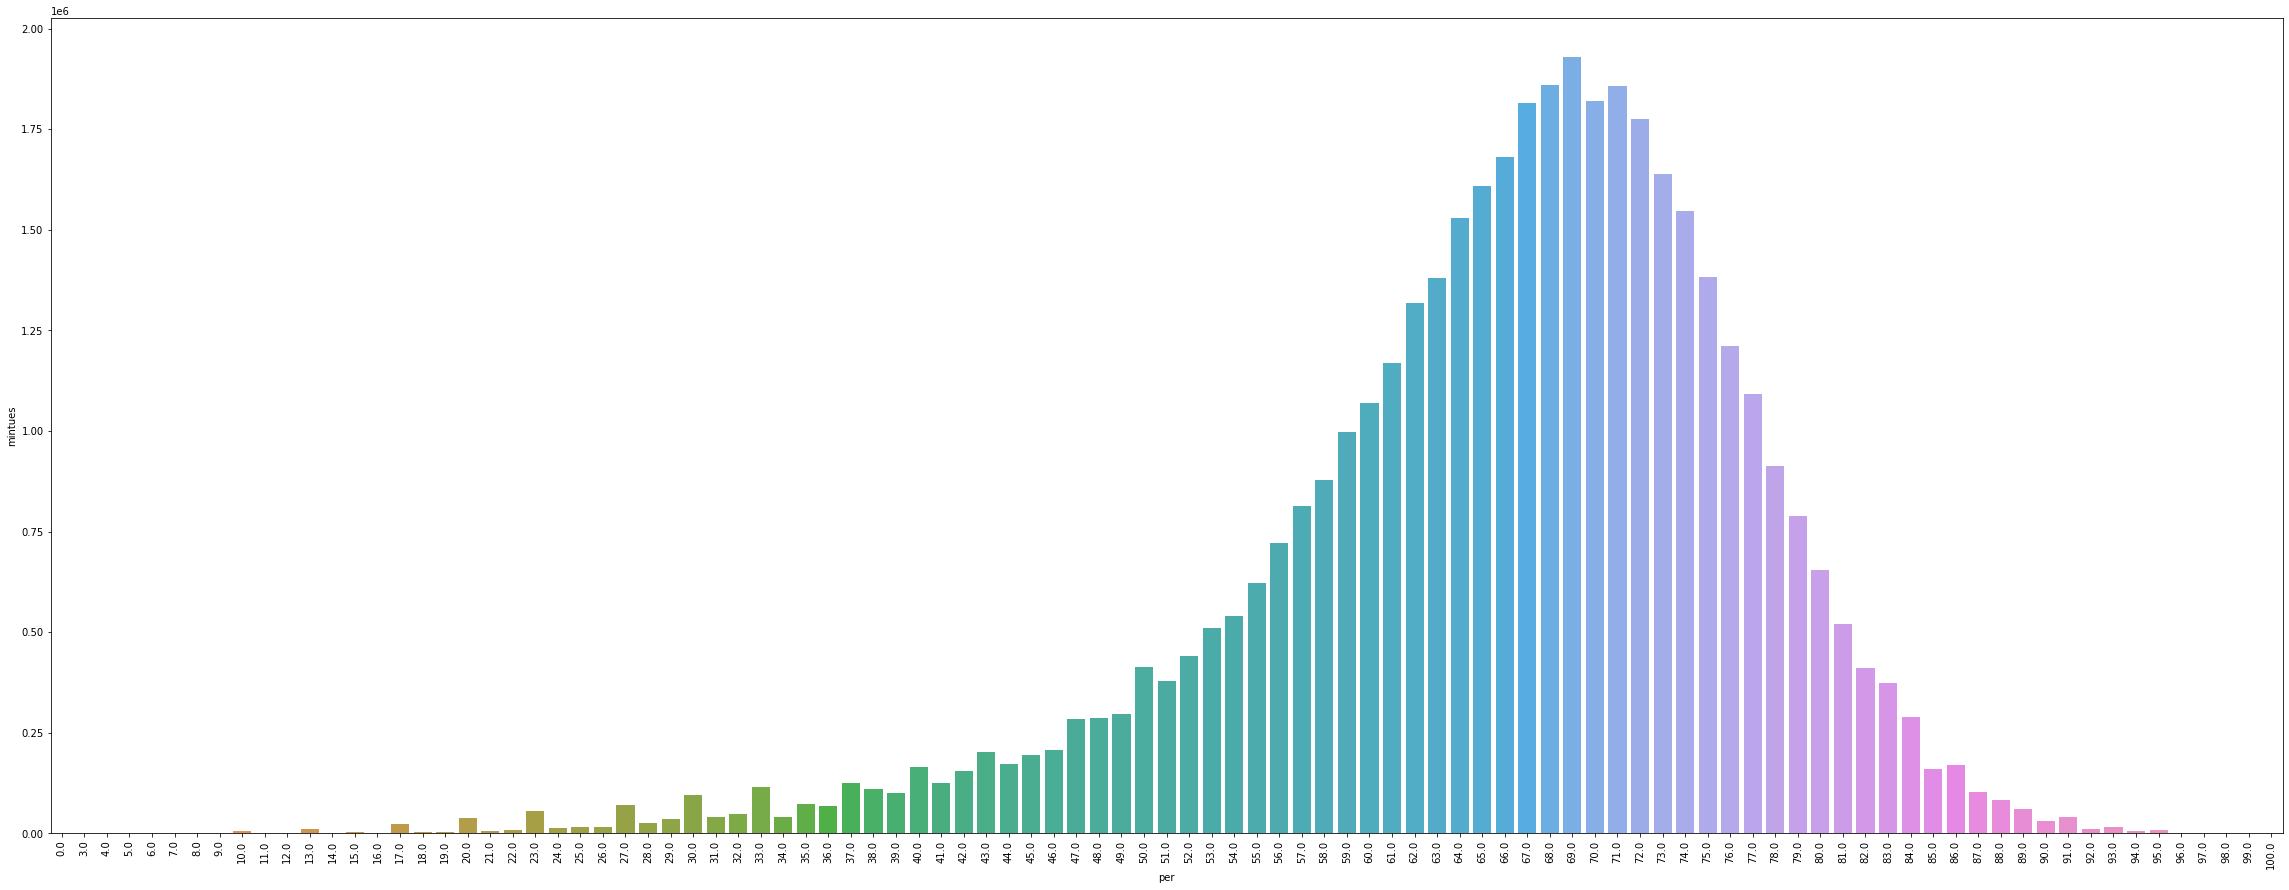

In [34]:
grp_per=g.groupby(['per']).sum().round().reset_index().sort_values('per')

plt.figure(figsize=(40,15))
sns.barplot(x='per',y='mintues',data=grp_per,order=grp_per['per'])
plt.xticks(rotation=90)
plt.show()

#addlabels(grp_per['per'].values,grp_per['mintues'].values)

**Observation:**

Suprisingly, based on performace percentage the time spent by each set of user for particualar percentage follows gaussain distribution
it means that lot of time is spent by users who had mid range percentage i.e 55 to 80

And users who had 69 percentage spent more time on content

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


g[['norm_ans','norm_total','norm_min']]=scaler.fit_transform(g[['answered_correctly','total','mintues']])
g.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per,mintues,norm_ans,norm_total,norm_min
0,115,32.0,896999.0,46,70.0,15.0,0.002238,0.002556,0.000863
1,124,7.0,544997.0,30,23.0,9.0,0.000490,0.001647,0.000518
2,2746,11.0,325000.0,19,58.0,5.0,0.000769,0.001022,0.000288
3,5382,84.0,4470000.0,125,67.0,74.0,0.005874,0.007042,0.004257
4,8623,70.0,2819600.0,109,64.0,47.0,0.004895,0.006134,0.002704


In [36]:
s=g.sort_values('total',ascending=True)  #sorting the data based on total question attempoted by each user
s.head()

,user_id,answered_correctly,prior_question_elapsed_time,total,per,mintues,norm_ans,norm_total,norm_min
189840,1038928152,1.0,0.0,1,100.0,0.0,0.00007,0.0,0.0
11057,60215278,1.0,0.0,1,100.0,0.0,0.00007,0.0,0.0
355559,1940480669,0.0,0.0,1,0.0,0.0,0.00000,0.0,0.0
294758,1610758750,1.0,0.0,1,100.0,0.0,0.00007,0.0,0.0
116628,639106254,1.0,0.0,1,100.0,0.0,0.00007,0.0,0.0


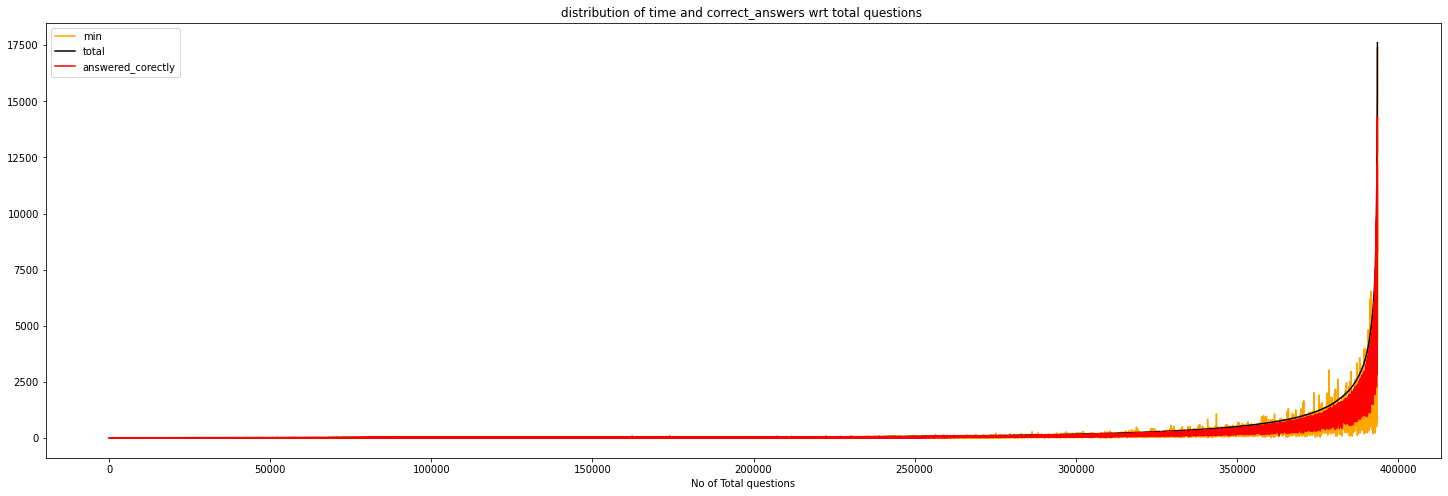

In [37]:

plt.figure(figsize=(25,8))


plt.plot(range(len(s)),s['mintues'].values,label='min',color='orange')

plt.plot(range(len(s)),s['total'].values,label='total',color='black')
plt.plot(range(len(s)),s['answered_correctly'].values,label='answered_corectly',color='red')

plt.title('distribution of time and correct_answers wrt total questions ')
plt.xlabel('No of Total questions')
plt.legend()
plt.show()

**Observation:**

It seems like a pareto distribution i.e lot of users who attempted very less questions and very less users attempted more questions
and times also following the same pattern of total questions,as questions increasing time also increasing 

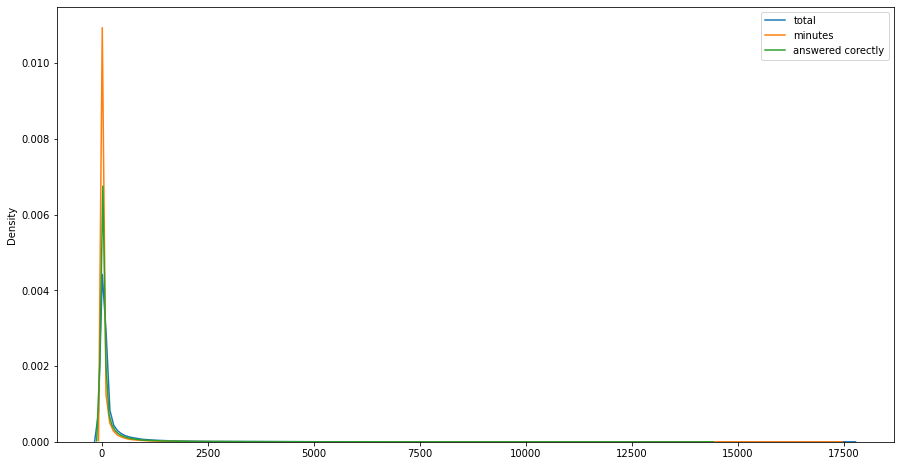

In [38]:
plt.figure(figsize=(15,8))
sns.distplot(s['total'].values,hist=False,label='total')
sns.distplot(s['mintues'].values,hist=False,label='minutes')
sns.distplot(s['answered_correctly'].values,hist=False,label='answered corectly')
plt.legend()
plt.show()

**Observation:**

And three features follows the same dsitribution i.e total questions and corect answers and time are related to each other

In [39]:
grp_per.head()

,per,user_id,answered_correctly,prior_question_elapsed_time,total,mintues
0,0.0,199778150095,0.0,25346712.0,1311,424.0
1,3.0,37956697208,32.0,15138908.0,965,253.0
2,4.0,1384170187,2.0,882000.0,50,15.0
3,5.0,11411812300,13.0,5925559.0,261,98.0
4,6.0,52266213560,63.0,18112356.0,1024,299.0


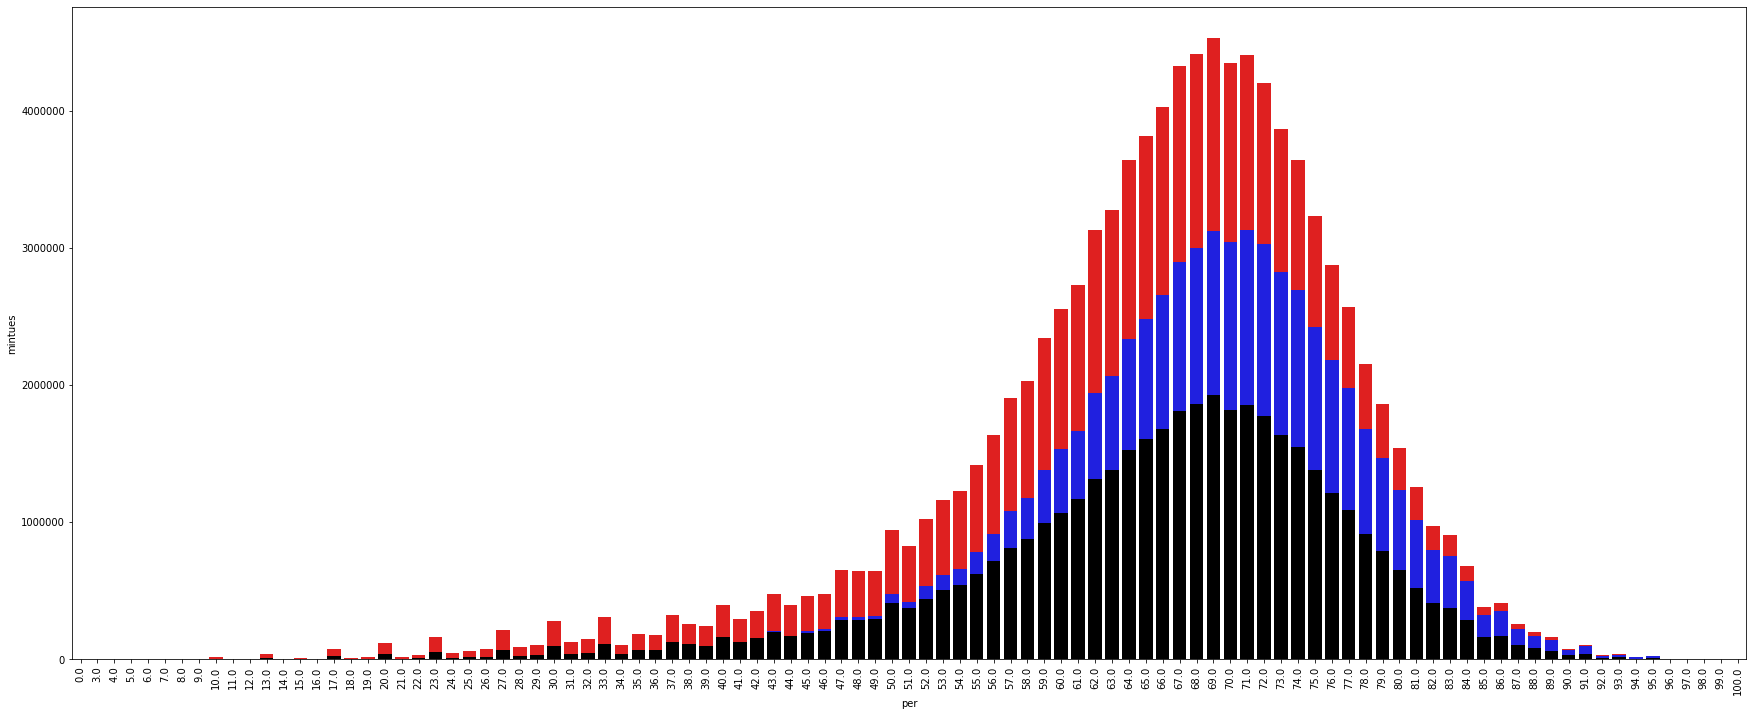

In [40]:
plt.figure(figsize=(30,12))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x='per',y='total',data=grp_per,color='red')
sns.barplot(x='per',y='answered_correctly',data=grp_per,color='blue')
sns.barplot(x='per',y='mintues',data=grp_per,color='black')
plt.xticks(rotation=90)
plt.show()

**Observation:**

1.Total Question,answered_corecctly and time follows the gaussain distribution when percantge of users is considered

2.As we know percentage/performance of users following the gausaiin distribution,so the total question attempted by each percentage users also follwong the gaussian vibes and interestly out of total questions ,the correct answers are also folling gaussain

3.And as we come to know that time is dependnt on total questions,so based on questions distribution ,time distribution is also matching 

4.In final,there lot of questions/time spent by the users who got percentage of 50 to 80 range and rest of them have very less contribution of questions ,so time also low

## Finding the level of content i.e easy ,medium and hard:

There may be case like for some x content, 1000 users attempted and only 20 given correct answers
so that we get to know that x conetnt is very tough to students

In [41]:
new.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [42]:
cont=new[['content_id','answered_correctly','prior_question_elapsed_time']].groupby('content_id').sum().reset_index()
cont_=new[['content_id','answered_correctly']].groupby('content_id').count().reset_index()
cont['tot_ques']=cont_['answered_correctly'].values
cont['min']=np.round(cont['prior_question_elapsed_time']/60000)
cont['per']=np.round((cont['answered_correctly']/cont['tot_ques'])*100)
cont.head()

,content_id,answered_correctly,prior_question_elapsed_time,tot_ques,min,per
0,0,6266.0,1.509616e+08,6903,2516.0,91.0
1,1,6589.0,1.634339e+08,7398,2724.0,89.0
2,2,24890.0,1.057277e+09,44905,17621.0,55.0
3,3,17906.0,5.356553e+08,22973,8928.0,78.0
4,4,19461.0,7.338819e+08,31736,12231.0,61.0


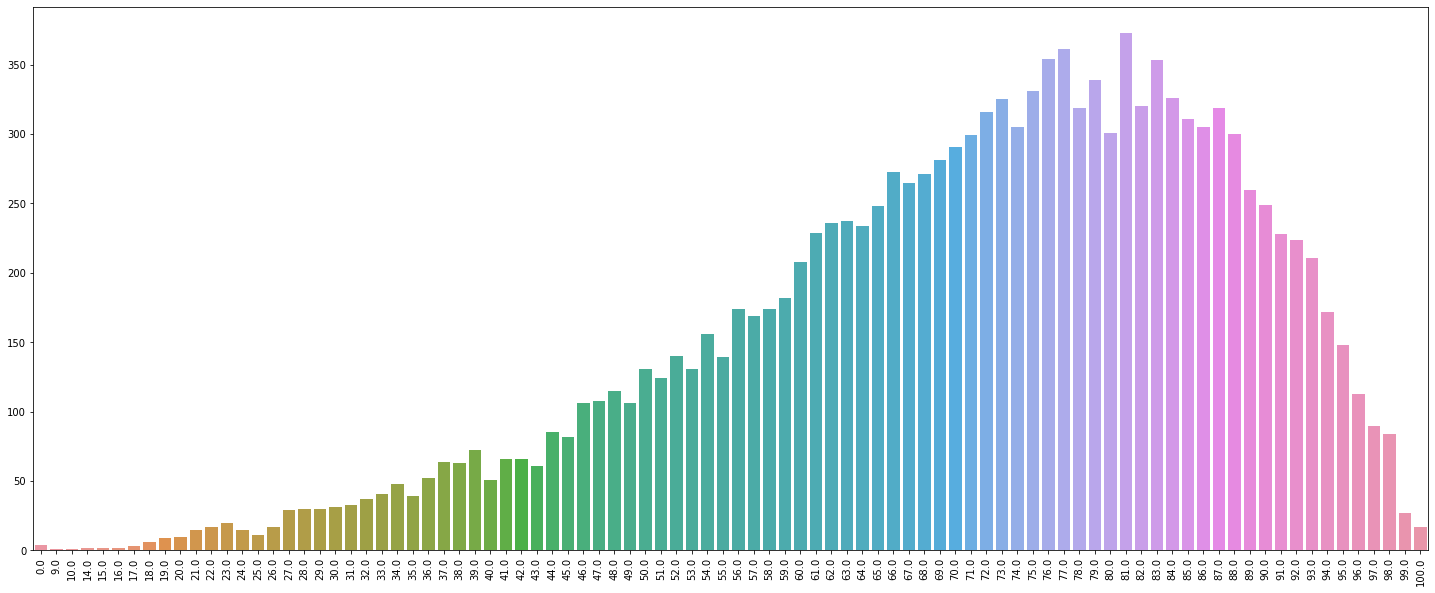

In [43]:
plt.figure(figsize=(25,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x=cont['per'].value_counts().index,y=cont['per'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

**Observation:**

Ther percentage of answer question with respect to each contents also follows slightly gaussian distributiion

In [44]:

cont['diff']=cont['tot_ques']-cont['answered_correctly']
new_con=cont[cont['diff']>0]
new_con.head()

,content_id,answered_correctly,prior_question_elapsed_time,tot_ques,min,per,diff
0,0,6266.0,1.509616e+08,6903,2516.0,91.0,637.0
1,1,6589.0,1.634339e+08,7398,2724.0,89.0,809.0
2,2,24890.0,1.057277e+09,44905,17621.0,55.0,20015.0
3,3,17906.0,5.356553e+08,22973,8928.0,78.0,5067.0
4,4,19461.0,7.338819e+08,31736,12231.0,61.0,12275.0


## Contents/questions that are very tough i.e among all users who attempted ,only few users given correct answer

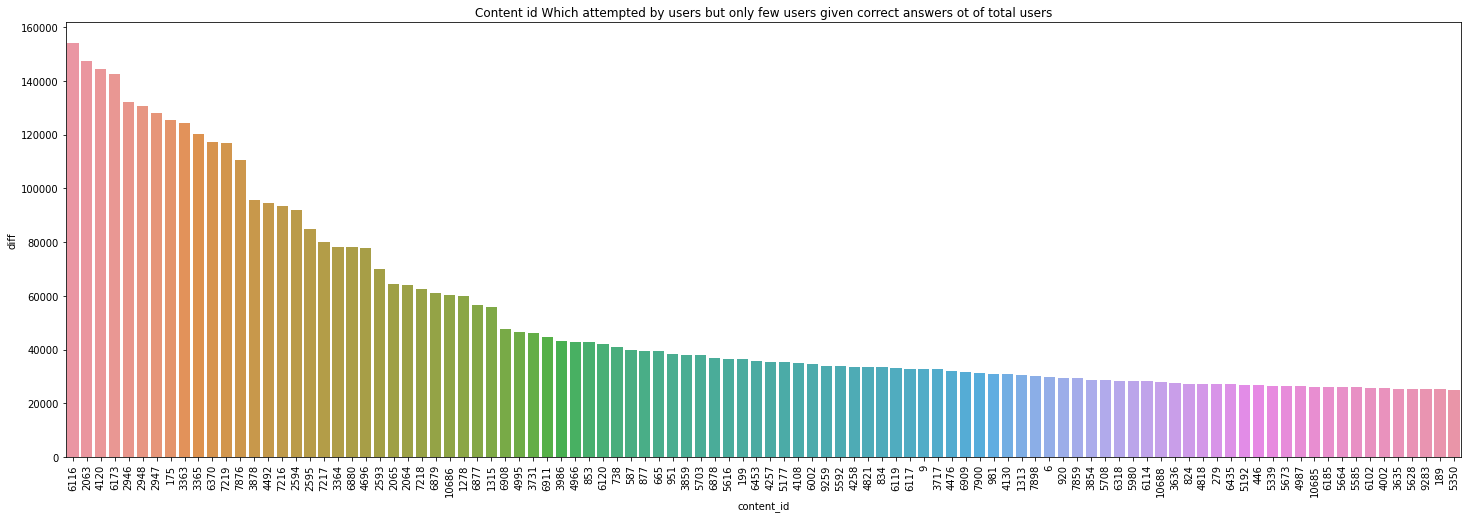

In [45]:
plt.figure(figsize=(25,8))
tough=new_con.sort_values('diff',ascending=False)[:100]  #more the diff btn total question attempted and correctly asnweres
                                                        #it means that very less users had answered it out of total users attemoted
sns.barplot(x='content_id',y='diff',data=tough,order=tough['content_id'])
plt.title('Content id Which attempted by users but only few users given correct answers ot of total users')
plt.xticks(rotation=90)
plt.show()

**Observation:**


1.Above graphs shows some content id which seems very tough to users i.e. only few user given correct answers out of total users attempted.

2.Graphs is plotted by taking difference between total question attempted and correctly answered out of it for each content,so it may be case that more the diff more the tough the content was.




## Contents which recevied lot of correct answers irrespective of total attempted on it (purely focusing on correct answers)


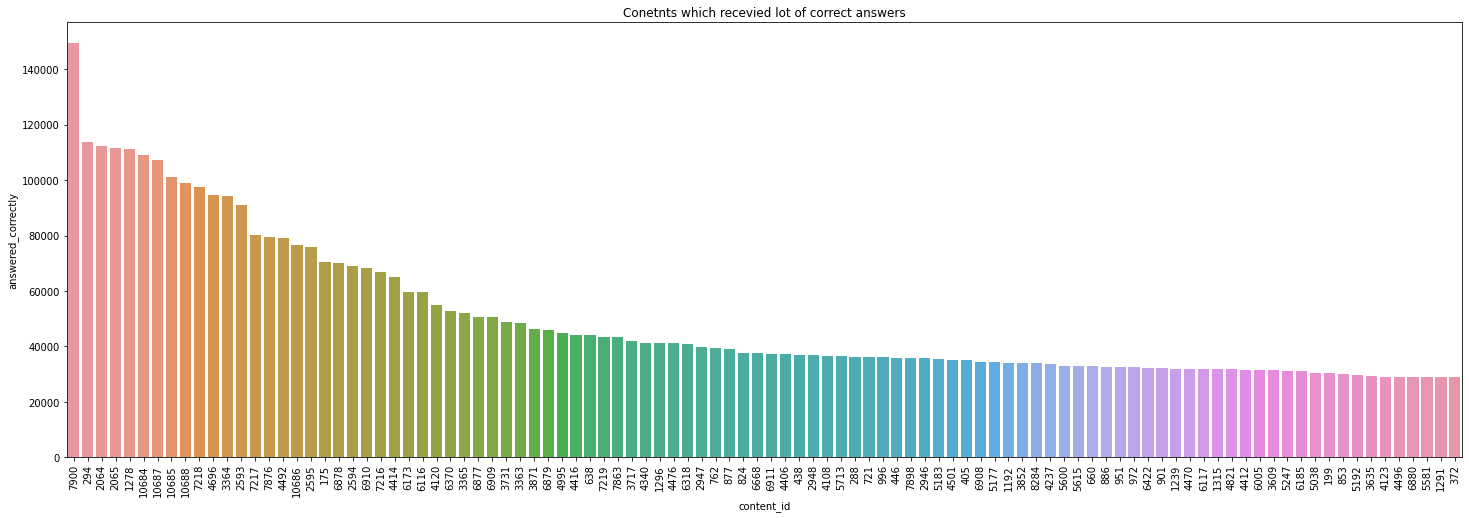

In [46]:
plt.figure(figsize=(25,8))
easy=new_con.sort_values('answered_correctly',ascending=False)[:100]
sns.barplot(x='content_id',y='answered_correctly',data=easy,order=easy['content_id'])

plt.title('Conetnts which recevied lot of correct answers')
plt.xticks(rotation=90)
plt.show()

## Contents which out of all users who attempted this,every one given correct answers(100% success ratio of that content)

In [47]:
zero=cont[cont['diff']==0]
zero.head()

,content_id,answered_correctly,prior_question_elapsed_time,tot_ques,min,per,diff
3572,3572,5.0,81000.0,5,1.0,100.0,0.0
4741,4741,18.0,292000.0,18,5.0,100.0,0.0
5823,5823,1.0,21000.0,1,0.0,100.0,0.0
7548,7548,11.0,588400.0,11,10.0,100.0,0.0
7549,7549,11.0,588400.0,11,10.0,100.0,0.0


In [48]:
print('content with 100% success ratio:')
      
print(zero['content_id'].values)

content with 100% success ratio:
[ 3572  4741  5823  7548  7549  7566  7568  7850 10005 10006 10008 10033
 12615 12806 12809 12923 12949]


Above content seems easy so that each user who attempted given correct answer

## About lecture content

In [49]:
lec=data[data['content_type_id']==1]
lec.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
117,117,10183847,5382,16736,1,21,-1,-1,NaN,False
212,212,1424348597,5382,30207,1,104,-1,-1,NaN,False
216,216,1425557777,5382,18545,1,121,-1,-1,NaN,False
295,295,405813029,8623,10540,1,59,-1,-1,NaN,False


In [50]:
lec.shape

(1959032, 10)

**User who watched more lectures**

In [51]:
def count(length,feature,typee,title):
    if typee=='top':
        val=lec[feature].value_counts()[:length]
        plt.figure(figsize=(8,5))
        sns.barplot(x=val.index,y=val.values,order=val.index)
        plt.xlabel(feature)
        plt.title(title)
        plt.ylabel('count')
        plt.xticks(rotation=90)
        plt.show()
    elif typee=='least':
        val=lec[feature].value_counts().sort_values()[:length]
        plt.figure(figsize=(8,5))
        sns.barplot(x=val.index,y=val.values,order=val.index)
        plt.xlabel(feature)
        plt.title(title)
        plt.ylabel('count')
        plt.xticks(rotation=90)
        plt.show()      

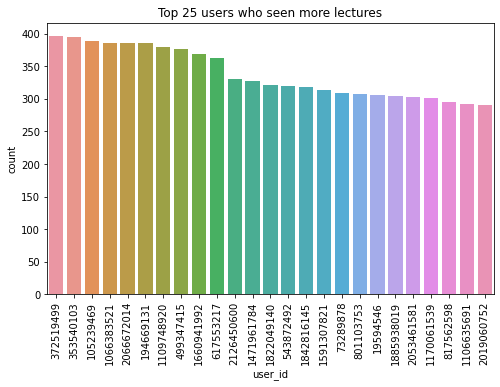

In [52]:
count(25,'user_id',typee='top',title='Top 25 users who seen more lectures')

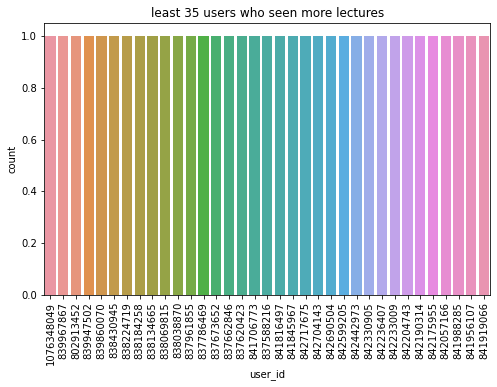

In [53]:
count(35,'user_id',typee='least',title='least 35 users who seen more lectures')

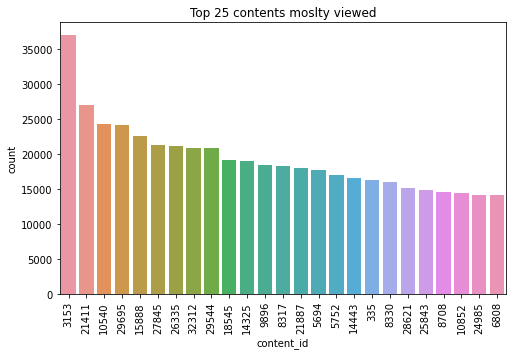

In [54]:
count(25,'content_id',typee='top',title='Top 25 contents moslty viewed')

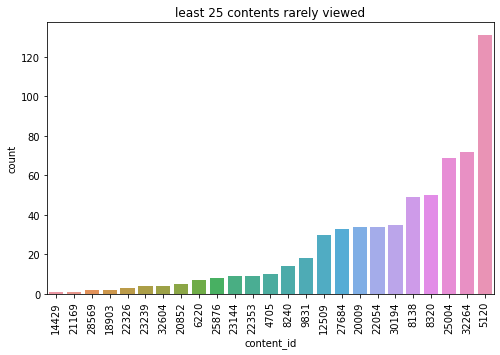

In [55]:
count(25,'content_id',typee='least',title='least 25 contents rarely viewed')

In [56]:
#total no of uniqye contents

length=len(lec['content_id'].value_counts())
length

415

# lets check question and lecture dataset

In [57]:
lecture=pd.read_csv('../input/riiid-test-answer-prediction/lectures.csv')
lecture.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [58]:
lecture.shape

(418, 4)

## Exploring the lecture datset

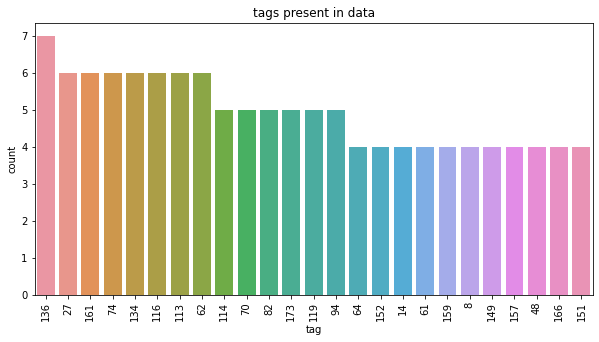

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x='tag',data=lecture,order=lecture['tag'].value_counts().iloc[:25].index)

plt.title('tags present in data')
plt.xticks(rotation=90)
plt.show()  

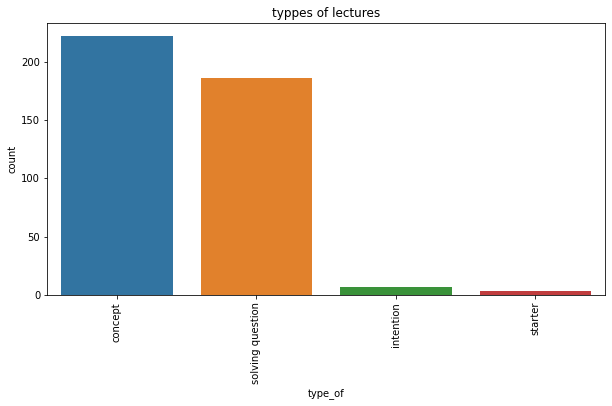

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x='type_of',data=lecture,order=lecture['type_of'].value_counts().index)
plt.title('typpes of lectures')
plt.xticks(rotation=90)
plt.show()  

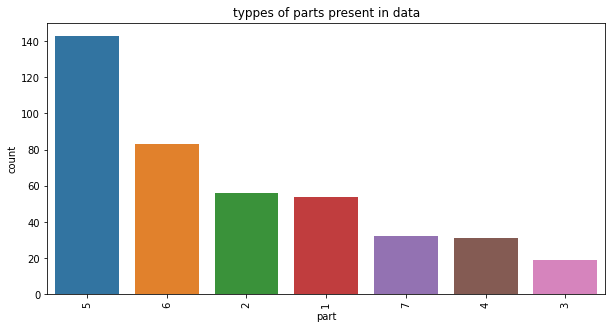

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='part',data=lecture,order=lecture['part'].value_counts().index)
plt.title('typpes of parts present in data')
plt.xticks(rotation=90)
plt.show()  

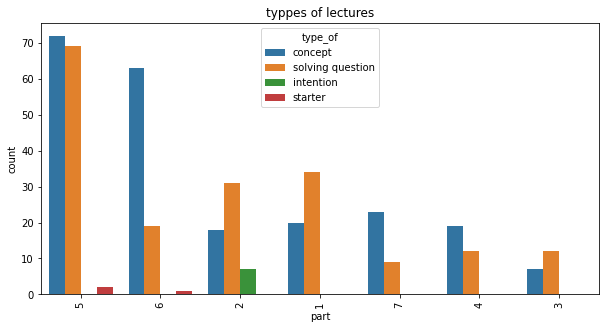

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x='part',data=lecture,hue='type_of',order=lecture['part'].value_counts().index)
plt.title('typpes of lectures')
plt.xticks(rotation=90)
plt.show()  

**Observation:**

Lectures are more related to concepts and soliving questions

And in each part,most of content is related concept and solving questions but except part 2 and part 1 every part has more concept realted lectures than solving questions

## Understanding the questions data

In [63]:
question=pd.read_csv('../input/riiid-test-answer-prediction/questions.csv')
question.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [64]:
question.shape

(13523, 5)

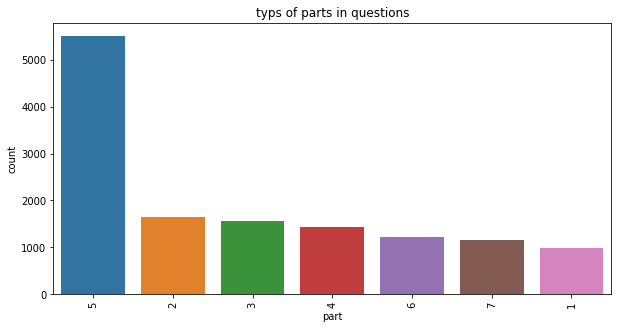

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='part',data=question,order=question['part'].value_counts().index)
plt.title('typs of parts in questions')
plt.xticks(rotation=90)
plt.show()  


## Feature engineering:

We can create features realted to difficulty level of content i.e no of users given correct answers/total no of users answered  and also same for users_id i.e no of questions he answeres/total attempted by him,these features gives more weight to model as it able understand the behavaiour of content(like how hard and easy it is) and user(how good his performance) which helps in predict whther x user able to give correct answeer for given x content
